data science end of year project part 3 cats vs dogs 9.8.21

In [1]:
#all the imports that i will need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score  
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os
import cv2

in the next 4 cells i will be importing the data from picture form.
<br>when i import the pictures i will be changing the size to 100x100 pixcels and making them gray scale.
<br>because i dont want this done every time i rerun the notebook the next cells will be text because the code has alteady been run. 

In [3]:
# train_dir=r'C:\Users\nechd\Desktop\train1'
# test_dir=r'C:\Users\nechd\Desktop\test1'
# image_size=100

In [4]:
#def label_img(img):
#    word_label=img.split('.')[-3]
#    if word_label=='cat':return [0]
#    elif word_label =='dog':return [1]

In [5]:
#def create_train_data():
#    training_data=[]
#    for img in (os.listdir(train_dir)):
#        label=label_img(img)
#        path=os.path.join(train_dir,img)
#        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
#        training_data.append([img,label])
#    np.save('train_data.npy',training_data)
#    return training_data

In [6]:
# train_data=create_train_data()

in the next 5 cells i will be taking the data and putting into a dataframe format then save it on the computer and reupload it.
<br> because i dont want this done every time i rerun the notebook the next cells will be text because the code has already been run. 

In [7]:
# def create_pic_row(y):
#    df3=pd.DataFrame(train_data[y][0][0])
#    for x in range (1,100):
#        df2=pd.DataFrame(train_data[y][0][x])
#        df3= df3.append(df2)
#    df5=pd.DataFrame(train_data[y][1])
#    df3= df3.append(df5)
#    df3=df3.T
#    return df3

In [8]:
#data=create_pic_row(0)
#for y in range(1,24999):
#    count=y
#    data1=create_pic_row(y) 
#    data=data.append(data1) 
#    print(y)
#data      


In [9]:
#columns=np.arange(0,10001)
#rows=np.arange(0,24999)

In [10]:
#data=data.set_axis(columns, axis='columns')
#data=data.set_index(rows)

In [11]:
#data.to_csv('cats_vs_dogs_train.csv')

In [12]:
#importing the train data frame that is saved to my computer
training_set=pd.read_csv(r"C:\Users\nechd\Desktop\cats_vs_dogs_train.csv")

In [13]:
training_set=training_set.drop(['Unnamed: 0'], axis=1)
training_set

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [14]:
training_set1=training_set
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [15]:
label=pd.DataFrame()
label

""


In [16]:
label=training_set1['10000']
label

0        0
1        0
2        0
3        0
4        0
        ..
24994    1
24995    1
24996    1
24997    1
24998    1
Name: 10000, Length: 24999, dtype: int64

In [17]:
training_set1=training_set1.div(255)
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.658824,0.682353,0.694118,0.709804,0.725490,0.737255,0.745098,0.756863,0.768627,0.776471,...,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.000000
1,0.168627,0.172549,0.168627,0.164706,0.203922,0.133333,0.200000,0.156863,0.152941,0.247059,...,0.184314,0.196078,0.192157,0.215686,0.247059,0.250980,0.349020,0.074510,0.141176,0.000000
2,0.152941,0.098039,0.168627,0.192157,0.184314,0.223529,0.227451,0.211765,0.207843,0.231373,...,0.619608,0.588235,0.521569,0.529412,0.568627,0.627451,0.662745,0.670588,0.600000,0.000000
3,0.866667,0.878431,0.870588,0.894118,0.898039,0.878431,0.878431,0.921569,0.898039,0.890196,...,0.831373,0.800000,0.800000,0.796078,0.843137,0.870588,0.850980,0.827451,0.835294,0.000000
4,0.450980,0.466667,0.478431,0.356863,0.325490,0.372549,0.517647,0.513725,0.584314,0.705882,...,0.376471,0.380392,0.368627,0.392157,0.466667,0.372549,0.352941,0.372549,0.321569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.478431,0.501961,0.486275,0.490196,0.498039,0.505882,0.509804,0.501961,0.490196,0.478431,...,0.192157,0.192157,0.176471,0.125490,0.125490,0.137255,0.101961,0.082353,0.066667,0.003922
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745,0.003922
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196,0.003922
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902,0.003922


In [18]:
training_set1=training_set1.drop(['10000'], axis=1)
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.658824,0.682353,0.694118,0.709804,0.725490,0.737255,0.745098,0.756863,0.768627,0.776471,...,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843
1,0.168627,0.172549,0.168627,0.164706,0.203922,0.133333,0.200000,0.156863,0.152941,0.247059,...,0.172549,0.184314,0.196078,0.192157,0.215686,0.247059,0.250980,0.349020,0.074510,0.141176
2,0.152941,0.098039,0.168627,0.192157,0.184314,0.223529,0.227451,0.211765,0.207843,0.231373,...,0.600000,0.619608,0.588235,0.521569,0.529412,0.568627,0.627451,0.662745,0.670588,0.600000
3,0.866667,0.878431,0.870588,0.894118,0.898039,0.878431,0.878431,0.921569,0.898039,0.890196,...,0.905882,0.831373,0.800000,0.800000,0.796078,0.843137,0.870588,0.850980,0.827451,0.835294
4,0.450980,0.466667,0.478431,0.356863,0.325490,0.372549,0.517647,0.513725,0.584314,0.705882,...,0.364706,0.376471,0.380392,0.368627,0.392157,0.466667,0.372549,0.352941,0.372549,0.321569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.478431,0.501961,0.486275,0.490196,0.498039,0.505882,0.509804,0.501961,0.490196,0.478431,...,0.207843,0.192157,0.192157,0.176471,0.125490,0.125490,0.137255,0.101961,0.082353,0.066667
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.643137,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.376471,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.396078,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902


In [19]:
training_set1['label']=label
training_set1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0.658824,0.682353,0.694118,0.709804,0.725490,0.737255,0.745098,0.756863,0.768627,0.776471,...,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0
1,0.168627,0.172549,0.168627,0.164706,0.203922,0.133333,0.200000,0.156863,0.152941,0.247059,...,0.184314,0.196078,0.192157,0.215686,0.247059,0.250980,0.349020,0.074510,0.141176,0
2,0.152941,0.098039,0.168627,0.192157,0.184314,0.223529,0.227451,0.211765,0.207843,0.231373,...,0.619608,0.588235,0.521569,0.529412,0.568627,0.627451,0.662745,0.670588,0.600000,0
3,0.866667,0.878431,0.870588,0.894118,0.898039,0.878431,0.878431,0.921569,0.898039,0.890196,...,0.831373,0.800000,0.800000,0.796078,0.843137,0.870588,0.850980,0.827451,0.835294,0
4,0.450980,0.466667,0.478431,0.356863,0.325490,0.372549,0.517647,0.513725,0.584314,0.705882,...,0.376471,0.380392,0.368627,0.392157,0.466667,0.372549,0.352941,0.372549,0.321569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.478431,0.501961,0.486275,0.490196,0.498039,0.505882,0.509804,0.501961,0.490196,0.478431,...,0.192157,0.192157,0.176471,0.125490,0.125490,0.137255,0.101961,0.082353,0.066667,1
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745,1
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196,1
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902,1


In [20]:
#splitting the data
# i need to split it into 3 parts 
train_set, test_set1 = train_test_split(training_set1, test_size=0.3, random_state=42)
test_set, test_set_dont_touch=train_test_split(test_set1, test_size=0.5, random_state=42)

In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17499 entries, 4913 to 23654
Columns: 10001 entries, 0 to label
dtypes: float64(10000), int64(1)
memory usage: 1.3 GB


In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 23922 to 24214
Columns: 10001 entries, 0 to label
dtypes: float64(10000), int64(1)
memory usage: 286.2 MB


In [23]:
test_set_dont_touch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 17149 to 8198
Columns: 10001 entries, 0 to label
dtypes: float64(10000), int64(1)
memory usage: 286.2 MB


In [24]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
4913,0.109804,0.152941,0.215686,0.290196,0.101961,0.058824,0.082353,0.074510,0.035294,0.070588,...,0.796078,0.811765,0.807843,0.803922,0.803922,0.807843,0.780392,0.760784,0.752941,0
9338,0.929412,0.945098,0.937255,0.941176,0.949020,0.933333,0.929412,0.925490,0.913725,0.929412,...,0.658824,0.619608,0.623529,0.462745,0.498039,0.576471,0.552941,0.568627,0.686275,0
24210,0.803922,0.737255,0.639216,0.529412,0.482353,0.549020,0.537255,0.486275,0.435294,0.392157,...,0.670588,0.658824,0.662745,0.650980,0.611765,0.541176,0.450980,0.392157,0.352941,1
18790,0.333333,0.341176,0.329412,0.317647,0.325490,0.329412,0.341176,0.349020,0.356863,0.360784,...,0.274510,0.168627,0.109804,0.321569,0.156863,0.133333,0.294118,0.341176,0.203922,1
16066,0.525490,0.513725,0.517647,0.521569,0.501961,0.478431,0.482353,0.458824,0.427451,0.439216,...,0.305882,0.447059,0.400000,0.333333,0.549020,0.482353,0.478431,0.423529,0.419608,1


In [25]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
23922,0.556863,0.627451,0.552941,0.572549,0.635294,0.623529,0.654902,0.658824,0.662745,0.658824,...,0.082353,0.082353,0.078431,0.070588,0.078431,0.074510,0.082353,0.090196,0.090196,1
3852,0.109804,0.094118,0.113725,0.098039,0.105882,0.113725,0.113725,0.094118,0.105882,0.094118,...,0.113725,0.109804,0.105882,0.105882,0.121569,0.113725,0.125490,0.101961,0.113725,0
16283,0.835294,0.882353,0.874510,0.862745,0.921569,0.901961,0.952941,0.819608,0.945098,0.898039,...,1.000000,0.972549,0.945098,0.776471,0.941176,0.905882,0.878431,0.882353,0.866667,1
4271,0.431373,0.384314,0.494118,0.505882,0.498039,0.513725,0.486275,0.517647,0.650980,0.619608,...,0.890196,0.843137,0.905882,0.862745,0.866667,0.862745,0.843137,0.882353,0.882353,0
11337,0.847059,0.819608,0.776471,0.843137,0.800000,0.686275,0.839216,0.866667,0.847059,0.792157,...,0.588235,0.435294,0.439216,0.482353,0.490196,0.552941,0.588235,0.576471,0.815686,0


In [26]:
test_set_dont_touch.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
17149,0.607843,0.647059,0.580392,0.537255,0.517647,0.592157,0.549020,0.580392,0.545098,0.568627,...,0.321569,0.258824,0.372549,0.470588,0.407843,0.392157,0.321569,0.400000,0.200000,1
11072,0.211765,0.211765,0.211765,0.219608,0.219608,0.223529,0.227451,0.227451,0.235294,0.239216,...,0.847059,0.854902,0.843137,0.870588,0.733333,0.725490,0.733333,0.639216,0.800000,0
11766,0.333333,0.360784,0.337255,0.337255,0.317647,0.325490,0.329412,0.321569,0.294118,0.313725,...,0.643137,0.615686,0.615686,0.611765,0.615686,0.611765,0.611765,0.619608,0.615686,0
1794,0.050980,0.031373,0.047059,0.023529,0.027451,0.066667,0.023529,0.039216,0.066667,0.066667,...,0.023529,0.023529,0.019608,0.015686,0.019608,0.015686,0.007843,0.007843,0.007843,0
1086,0.133333,0.054902,0.039216,0.168627,0.117647,0.058824,0.082353,0.050980,0.227451,0.176471,...,0.262745,0.215686,0.188235,0.207843,0.129412,0.278431,0.282353,0.152941,0.149020,0


In [27]:
# changing the data type and spliiting into x,y
train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')
test_set_dont_touch=np.array(test_set,dtype='float32')

x_train_set=train_set[ : , 0:10000]
y_train_set=train_set[ : , 10000]
x_test_set=test_set[ : , 0:10000]
y_test_set=test_set[ : , 10000]
x_test_set_dont_touch=test_set_dont_touch[ : , 0:10000]
y_test_set_dont_touch=test_set_dont_touch[ : , 10000]

In [28]:
x_train_set

array([[0.10980392, 0.15294118, 0.21568628, ..., 0.78039217, 0.7607843 ,
        0.7529412 ],
       [0.92941177, 0.94509804, 0.9372549 , ..., 0.5529412 , 0.5686275 ,
        0.6862745 ],
       [0.8039216 , 0.7372549 , 0.6392157 , ..., 0.4509804 , 0.39215687,
        0.3529412 ],
       ...,
       [0.25490198, 0.2784314 , 0.2627451 , ..., 0.15686275, 0.16078432,
        0.12156863],
       [0.5568628 , 0.6431373 , 0.5019608 , ..., 0.44705883, 0.46666667,
        0.6156863 ],
       [0.43529412, 0.28627452, 0.23529412, ..., 0.07058824, 0.08627451,
        0.07450981]], dtype=float32)

In [29]:
y_train_set

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [30]:
x_test_set

array([[0.5568628 , 0.627451  , 0.5529412 , ..., 0.08235294, 0.09019608,
        0.09019608],
       [0.10980392, 0.09411765, 0.11372549, ..., 0.1254902 , 0.10196079,
        0.11372549],
       [0.8352941 , 0.88235295, 0.8745098 , ..., 0.8784314 , 0.88235295,
        0.8666667 ],
       ...,
       [0.5058824 , 0.53333336, 0.3647059 , ..., 0.54509807, 0.6       ,
        0.5254902 ],
       [0.26666668, 0.2627451 , 0.31764707, ..., 0.14509805, 0.13725491,
        0.14509805],
       [0.3137255 , 0.33333334, 0.35686275, ..., 0.25490198, 0.25882354,
        0.27058825]], dtype=float32)

In [31]:
y_test_set

array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)

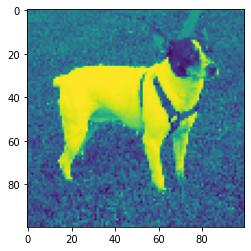

In [32]:
image1=x_train_set[7, :].reshape((100,100))
plt.imshow(image1)

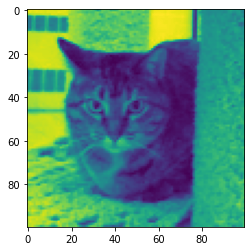

In [33]:
image1=x_train_set[1, :].reshape((100,100))
plt.imshow(image1)

In [34]:
# function to represent the confussion matrix nicely

def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')  

## PCA 0.9

In [35]:
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_test_reduced1=pca1.transform(x_test_set)

In [36]:
pca1.n_components_

331

In [37]:
arr=np.arange(5,80,5)
arr

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

In [38]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced1, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced1)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.5984
10 0.6146666666666667
15 0.6221333333333333
20 0.6210666666666667
25 0.6253333333333333
30 0.6253333333333333
35 0.6264
40 0.6349333333333333
45 0.6306666666666667
50 0.6368
55 0.6362666666666666
60 0.6336
65 0.6362666666666666
70 0.6328
75 0.6322666666666666


In [39]:
arr1=np.arange(40,56,1)
arr1

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])

In [40]:
for x in arr1:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced1, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced1)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    if (accuracy_knn_x>0.635):
        print (x,accuracy_knn_x )
    else:
        print(x)

40
41
42 0.6352
43
44
45
46
47
48 0.6378666666666667
49
50 0.6368
51
52 0.6392
53 0.6352
54 0.64
55 0.6362666666666666


In [41]:
knn1 = KNeighborsClassifier(n_neighbors=52)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.6392

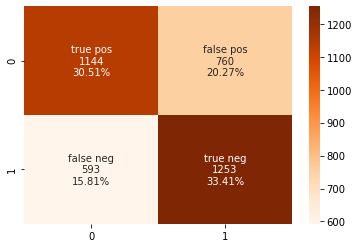

In [42]:
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
confussion_matrix(mat_knn1)

In [43]:
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1)) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1))

precision_score_knn: 0.6224540486835569
recall_score_knn: 0.6787648970747562
f1_score_knn: 0.6493910339466183


In [44]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.60657143 0.592      0.61685714 0.62       0.60245785] mean: 0.6075772833054343


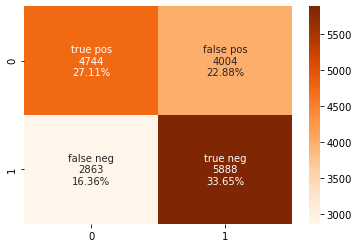

In [45]:
y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [46]:
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c))

precision_score: 0.5952284674484432
recall_score: 0.67283739001257
f1_score: 0.631657994957893


In [47]:
arr2=np.arange(25,525,25)
arr2

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500])

In [48]:
for x in arr2:
    XG1=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(x_train_reduced1, y_train_set)
    y_pred_XG1=XG1.predict(x_test_reduced1)
    accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
    if (accuracy_XG1>0.635):
        print (x,accuracy_XG1 )
    else:
        print(x)

25
50
75
100 0.636
125 0.6368
150 0.6418666666666667
175 0.6381333333333333
200 0.6368
225 0.6397333333333334
250 0.6429333333333334
275 0.6426666666666667
300 0.6394666666666666
325 0.6448
350 0.6474666666666666
375 0.6509333333333334
400 0.6506666666666666
425 0.6536
450 0.6525333333333333
475 0.652
500 0.6517333333333334


In [49]:
XG1=XGBClassifier(n_estimators=425, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.6536

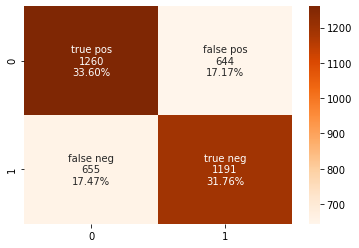

In [50]:
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
confussion_matrix(mat_XG1)

In [51]:
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1)) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1))

precision_score_XG1: 0.6490463215258856
recall_score_XG1: 0.6451787648970747
f1_score_XG1: 0.6471067644661777


In [52]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.62628571 0.63685714 0.62714286 0.63685714 0.64475564] mean: 0.6343797003225412


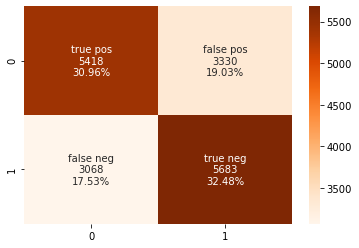

In [53]:
y_pred_xg1_c = cross_val_predict(XG1,  x_train_reduced1, y_train_set, cv=5)
cofussion_xg1=confusion_matrix(y_train_set, y_pred_xg1_c)
confussion_matrix(cofussion_xg1)

In [54]:
print("precision_score:",precision_score(y_train_set, y_pred_xg1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_xg1_c))
print("f1_score:",f1_score(y_train_set, y_pred_xg1_c))

precision_score: 0.6305336735826029
recall_score: 0.6494114958290481
f1_score: 0.6398333708624183


In [55]:
forest1= RandomForestClassifier(random_state=429)
forest1.fit(x_train_reduced1, y_train_set)
y_pred_forest1=forest1.predict(x_test_reduced1)
accuracy_forest1=metrics.accuracy_score(y_test_set, y_pred_forest1)
accuracy_forest1

0.5946666666666667

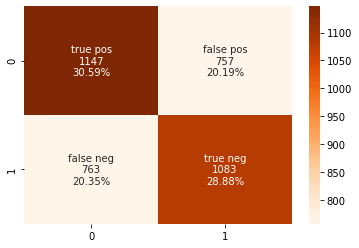

In [56]:
mat_forest1=confusion_matrix(y_test_set, y_pred_forest1)
confussion_matrix(mat_forest1)

In [57]:
print("precision_score:",precision_score(y_test_set, y_pred_forest1)) 
print("recall_score:",recall_score(y_test_set, y_pred_forest1))
print("f1_score:",f1_score(y_test_set, y_pred_forest1))

precision_score: 0.5885869565217391
recall_score: 0.5866738894907909
f1_score: 0.5876288659793814


In [58]:
#cross validation
cv_scores_forest1=cross_val_score(forest1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[0.58571429 0.58857143 0.57828571 0.612      0.60503001] mean: 0.5939202874290614


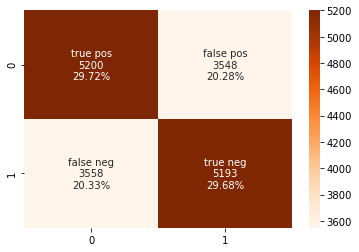

In [59]:
y_pred_forest1_c = cross_val_predict(forest1,  x_train_reduced1, y_train_set, cv=5)
cofussion_forest1=confusion_matrix(y_train_set, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [60]:
print("precision_score:",precision_score(y_train_set, y_pred_forest1_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_forest1_c))
print("f1_score:",f1_score(y_train_set, y_pred_forest1_c))

precision_score: 0.5940967852648439
recall_score: 0.5934178950977032
f1_score: 0.5937571461239425


## PCA 0.8

In [61]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_train_recovered2=pca2.inverse_transform(x_train_reduced2)
x_test_reduced2=pca2.transform(x_test_set)
x_test_recovered2=pca2.inverse_transform(x_test_reduced2)

In [62]:
pca2.n_components_

72

In [63]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced2, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced2)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.6024
10 0.6128
15 0.6149333333333333
20 0.6330666666666667
25 0.6293333333333333
30 0.6336
35 0.6298666666666667
40 0.6328
45 0.6290666666666667
50 0.6314666666666666
55 0.628
60 0.6346666666666667
65 0.6282666666666666
70 0.6237333333333334
75 0.6157333333333334


In [64]:
knn2 = KNeighborsClassifier(n_neighbors=16)
knn2.fit(x_train_recovered2, y_train_set)
y_pred_knn2=knn2.predict(x_test_recovered2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.6218666666666667

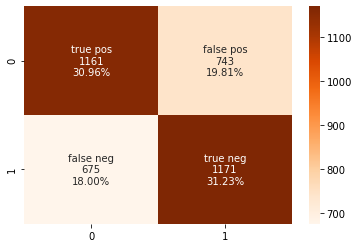

In [65]:
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
confussion_matrix(mat_knn2)

In [66]:
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2)) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2))

precision_score_knn2: 0.6118077324973876
recall_score_knn2: 0.6343445287107259
f1_score_knn2: 0.622872340425532


In [67]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.61114286 0.60428571 0.59685714 0.60628571 0.59531295] mean: 0.6027768750255176


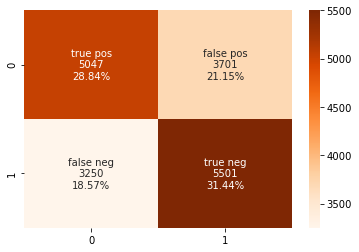

In [68]:
y_pred_knn2_c = cross_val_predict(knn2,  x_train_reduced2, y_train_set, cv=5)
cofussion_knn2=confusion_matrix(y_train_set, y_pred_knn2_c)
confussion_matrix(cofussion_knn2)

In [69]:
print("precision_score:",precision_score(y_train_set, y_pred_knn2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_knn2_c))
print("f1_score:",f1_score(y_train_set, y_pred_knn2_c))

precision_score: 0.5978048250380352
recall_score: 0.6286138727002628
f1_score: 0.6128223695204144


In [70]:
for x in arr2:
    XG2=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG2.fit(x_train_reduced2, y_train_set)
    y_pred_XG2=XG2.predict(x_test_reduced2)
    accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
    if (accuracy_XG2>0.625):
        print (x,accuracy_XG2 )
    else:
        print(x)

25
50 0.6309333333333333
75 0.6296
100 0.6336
125 0.6325333333333333
150 0.6333333333333333
175 0.6304
200 0.6325333333333333
225 0.6357333333333334
250 0.6354666666666666
275 0.6378666666666667
300 0.6376
325 0.6386666666666667
350 0.6368
375 0.6392
400 0.6378666666666667
425 0.6370666666666667
450 0.6416
475 0.6394666666666666
500 0.6394666666666666


In [71]:
arr3=np.arange(350,525,5)
for x in arr3:
    XG2=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG2.fit(x_train_reduced2, y_train_set)
    y_pred_XG2=XG2.predict(x_test_reduced2)
    accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
    if (accuracy_XG2>0.625):
        print (x,accuracy_XG2 )
    else:
        print(x)

350 0.6368
355 0.6362666666666666
360 0.6373333333333333
365 0.6381333333333333
370 0.6386666666666667
375 0.6392
380 0.6384
385 0.6373333333333333
390 0.6376
395 0.6378666666666667
400 0.6378666666666667
405 0.6365333333333333
410 0.6338666666666667
415 0.6365333333333333
420 0.6384
425 0.6370666666666667
430 0.6418666666666667
435 0.6429333333333334
440 0.6418666666666667
445 0.6424
450 0.6416
455 0.6418666666666667
460 0.64
465 0.6386666666666667
470 0.6384
475 0.6394666666666666
480 0.6386666666666667
485 0.6386666666666667
490 0.6405333333333333
495 0.6394666666666666
500 0.6394666666666666
505 0.6402666666666667
510 0.6381333333333333
515 0.636
520 0.6370666666666667


In [72]:
XG2=XGBClassifier(n_estimators=505, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.6402666666666667

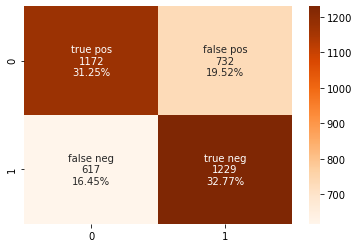

In [73]:
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
confussion_matrix(mat_XG2)

In [74]:
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2)) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2))

precision_score_XG2: 0.6267210606833248
recall_score_XG2: 0.6657638136511376
f1_score_XG2: 0.6456527449435251


In [75]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.63742857 0.62657143 0.62685714 0.63571429 0.62474993] mean: 0.6302642714244886


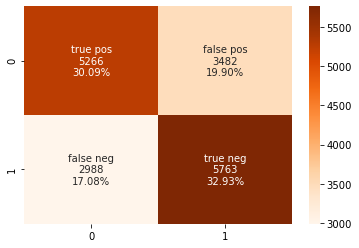

In [76]:
y_pred_xg2_c = cross_val_predict(XG2,  x_train_reduced2, y_train_set, cv=5)
cofussion_xg2=confusion_matrix(y_train_set, y_pred_xg2_c)
confussion_matrix(cofussion_xg2)

In [77]:
print("precision_score:",precision_score(y_train_set, y_pred_xg2_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_xg2_c))
print("f1_score:",f1_score(y_train_set, y_pred_xg2_c))

precision_score: 0.6233639805300162
recall_score: 0.6585533081933493
f1_score: 0.6404756612580573


## PCA 0.7

In [78]:
pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_train_recovered3=pca3.inverse_transform(x_train_reduced3)
x_test_reduced3=pca3.transform(x_test_set)
x_test_recovered3=pca3.inverse_transform(x_test_reduced3)

In [79]:
pca3.n_components_

25

In [80]:
arr=np.arange(5,60,5)
arr

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [81]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.5954666666666667
10 0.6197333333333334
15 0.6173333333333333
20 0.6298666666666667
25 0.6178666666666667
30 0.6264
35 0.6229333333333333
40 0.6232
45 0.6176
50 0.6264
55 0.6189333333333333


In [82]:
for x in range(10,30):
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )  

10 0.6197333333333334
11 0.6106666666666667
12 0.6234666666666666
13 0.6130666666666666
14 0.6237333333333334
15 0.6173333333333333
16 0.6253333333333333
17 0.6242666666666666
18 0.6314666666666666
19 0.6232
20 0.6298666666666667
21 0.6189333333333333
22 0.6245333333333334
23 0.6178666666666667
24 0.6208
25 0.6178666666666667
26 0.6245333333333334
27 0.6186666666666667
28 0.6232
29 0.6170666666666667


In [83]:
knn3 = KNeighborsClassifier(n_neighbors=16)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.6253333333333333

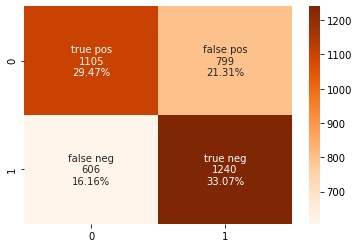

In [84]:
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
confussion_matrix(mat_knn3)

In [85]:
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3)) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3))

precision_score_knn3: 0.6081412457086808
recall_score_knn3: 0.6717226435536294
f1_score_knn3: 0.6383526383526383


In [86]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.602      0.60228571 0.61371429 0.616      0.59502715] mean: 0.6058054301228923


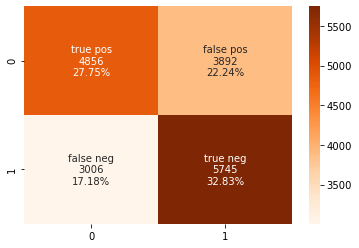

In [87]:
y_pred_knn3_c = cross_val_predict(knn3,  x_train_reduced3, y_train_set, cv=5)
cofussion_knn3=confusion_matrix(y_train_set, y_pred_knn3_c)
confussion_matrix(cofussion_knn3)

In [88]:
print("precision_score:",precision_score(y_train_set, y_pred_knn3_c)) 
print("recall_score:",recall_score(y_train_set, y_pred_knn3_c))
print("f1_score:",f1_score(y_train_set, y_pred_knn3_c))

precision_score: 0.5961398775552558
recall_score: 0.6564964004113816
f1_score: 0.6248640417663693


In [89]:
XG3=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_recovered3, y_train_set)
y_pred_XG3=XG3.predict(x_test_recovered3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.6317333333333334

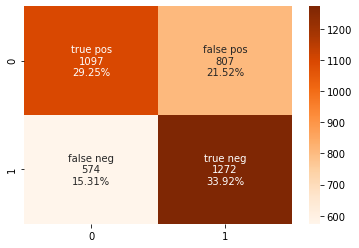

In [90]:
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
confussion_matrix(mat_XG3)

In [91]:
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3)) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3))

precision_score_XG3: 0.6118326118326118
recall_score_XG3: 0.6890574214517876
f1_score_XG3: 0.6481528662420382


In [92]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.62542857 0.62142857 0.61485714 0.63657143 0.62246356] mean: 0.6241498550606296
